### **Project Summary: Hyderabad House Price Prediction**

#### **1. Exploratory Data Analysis (EDA)**

We began by loading and analyzing the `Hyderabad.csv` dataset to understand its structure and content. Key findings included:
* The dataset contains listings with features like `Price`, `Area`, `Location`, `No. of Bedrooms`, and various amenities.
* The `Price` and `Area` features are right-skewed, with most properties clustered in the lower-to-mid range.
* `Kukatpally` and `Kondapur` are the locations with the most property listings.

#### **2. Data Preprocessing**

To prepare the data for modeling, we performed two key steps:
* **Feature Separation**: We designated `Price` as the target variable (y) and all other columns as features (X).
* **One-Hot Encoding**: We converted the categorical `Location` column into a numerical format. This process creates a binary column for each location, allowing the model to interpret the data without assuming an artificial order.

#### **3. Linear Regression Model**

We built a predictive model using Linear Regression to estimate property prices.
* **Training**: The model was trained on 80% of the dataset.
* **Evaluation**: We tested the model's performance on the remaining 20% of the data. The model achieved an **R-squared (R²) of 0.77**, meaning it could explain 77% of the price variance. The **Mean Absolute Error (MAE)** was approximately **2.1 million IDR**.
* **Interpretation**: The model proved effective, especially for properties in the lower-to-mid price range. However, analysis showed it was less accurate when predicting prices for high-end properties.

#### **4. Live Prediction Test**

Finally, we demonstrated how to use the trained model to predict the price of a single, custom-defined property. This test confirmed that the model provides logical and plausible price estimates based on the input features.

In [53]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
import pandas as pd
file_path = '../../../../Downloads/Hyderabad.csv'
df = pd.read_csv(file_path)
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# Exploring the relationship between price and area

In [32]:
# --- 1. Descriptive Statistics ---
print("Descriptive Statistics for Price, Area, and No. of Bedrooms:")
print(df[['Price', 'Area', 'No. of Bedrooms']].describe())

Descriptive Statistics for Price, Area, and No. of Bedrooms:
              Price         Area  No. of Bedrooms
count  2.518000e+03  2518.000000      2518.000000
mean   9.818380e+06  1644.571088         2.623511
std    8.777113e+06   746.256956         0.687330
min    2.000000e+06   500.000000         1.000000
25%    4.760000e+06  1160.000000         2.000000
50%    7.754000e+06  1500.000000         3.000000
75%    1.090000e+07  1829.000000         3.000000
max    1.650000e+08  9400.000000         8.000000


In [33]:
# --- 2. Location Analysis ---
print("\nTop 10 Locations by Number of Listings:")
location_counts = df['Location'].value_counts()
print(location_counts.head(10))


Top 10 Locations by Number of Listings:
Location
Kukatpally                   166
Kondapur                     149
Manikonda                    115
Nizampet                     106
Gachibowli                    83
Hitech City                   82
Miyapur                       80
Kokapet                       79
Pragathi Nagar Kukatpally     57
Bachupally Road               55
Name: count, dtype: int64


In [34]:
# Set plot style
sns.set_style("whitegrid")

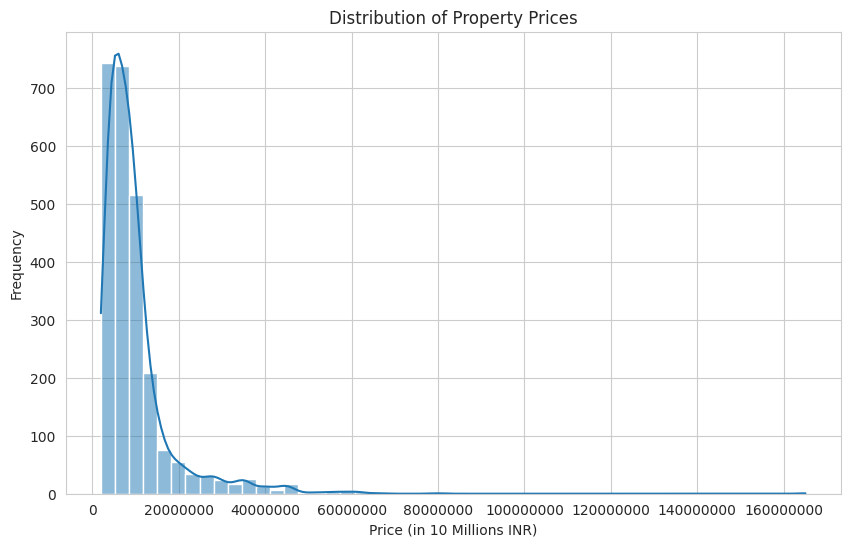

In [35]:
# a. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (in 10 Millions INR)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('price_distribution.png')

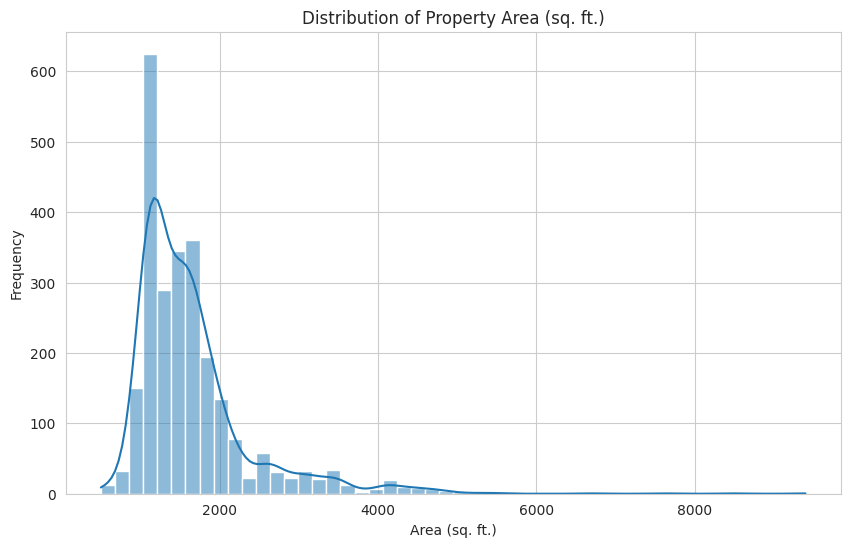

In [36]:
# b. Area Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Area'], kde=True, bins=50)
plt.title('Distribution of Property Area (sq. ft.)')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Frequency')
plt.savefig('area_distribution.png')

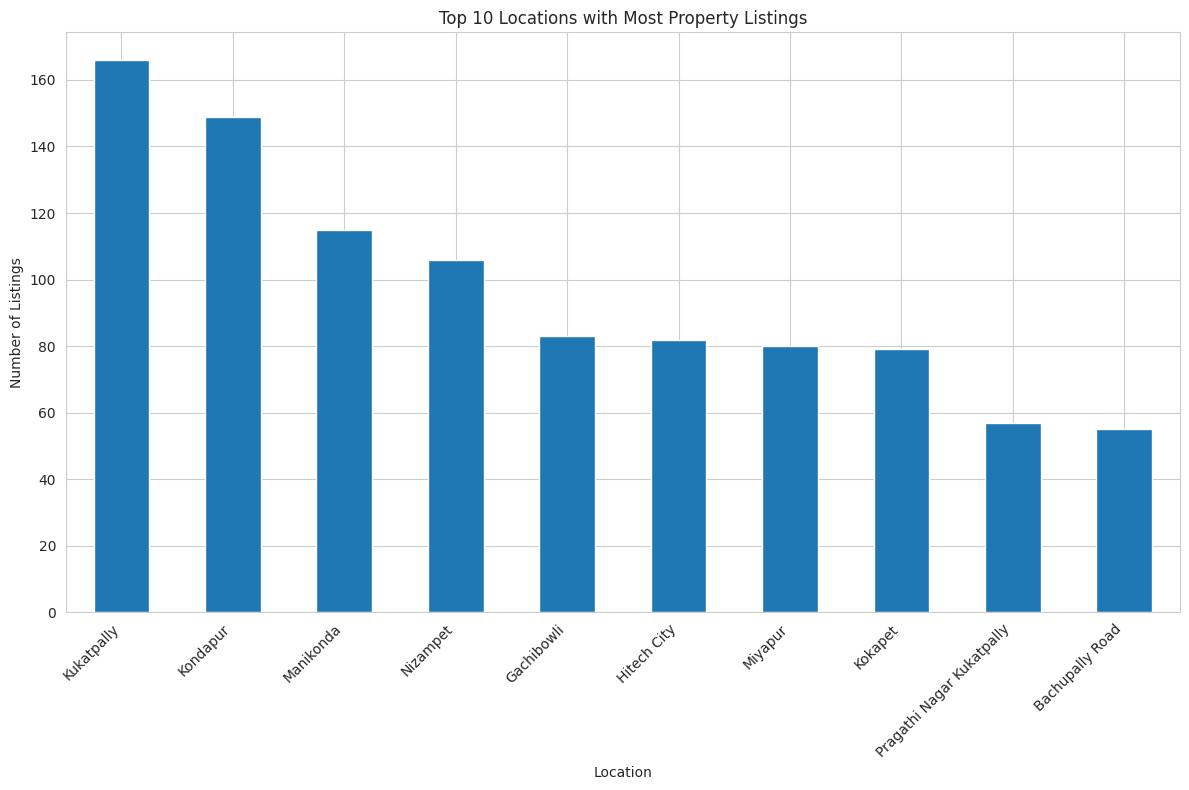

In [37]:
# c. Top 10 Locations Bar Chart
plt.figure(figsize=(12, 8))
location_counts.head(10).plot(kind='bar')
plt.title('Top 10 Locations with Most Property Listings')
plt.xlabel('Location')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_locations.png')

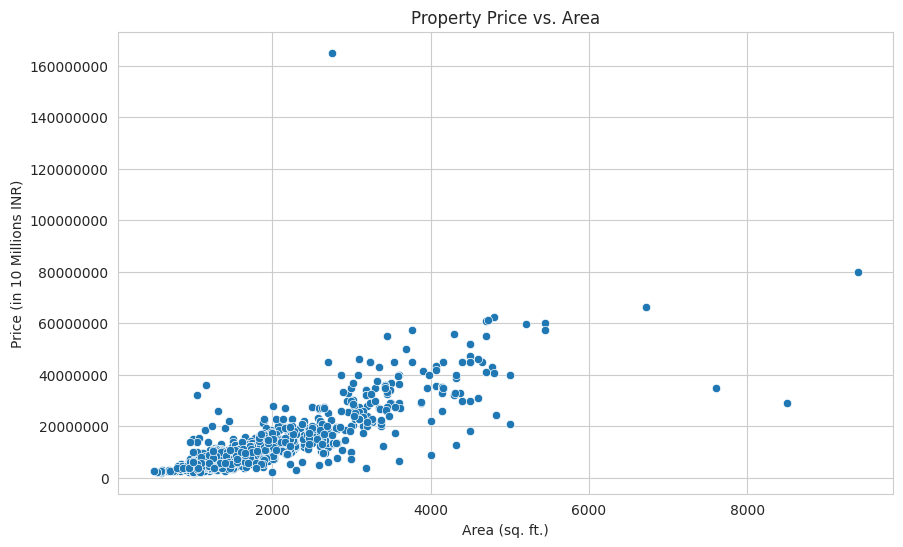

In [38]:
# d. Area vs. Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Property Price vs. Area')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price (in 10 Millions INR)')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('price_vs_area.png')

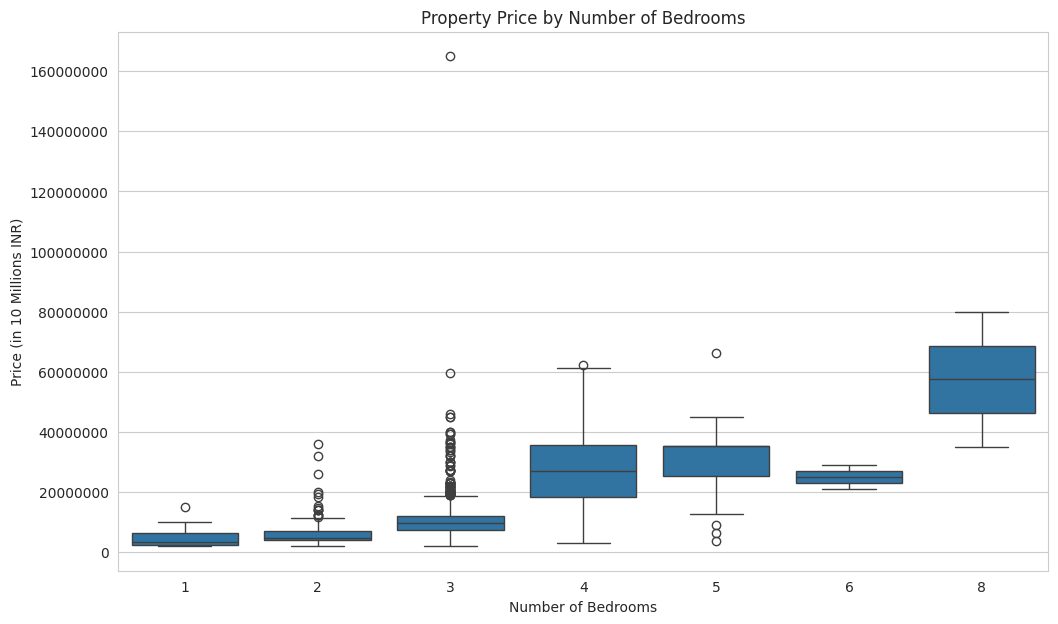

In [39]:
# e. Price vs. Number of Bedrooms Box Plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='No. of Bedrooms', y='Price', data=df)
plt.title('Property Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in 10 Millions INR)')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('price_vs_bedrooms.png')

In [40]:
# f. Amenities Frequency
amenities = df.columns[5:39] # Columns with amenities
amenities_counts = df[amenities].sum().sort_values(ascending=False)

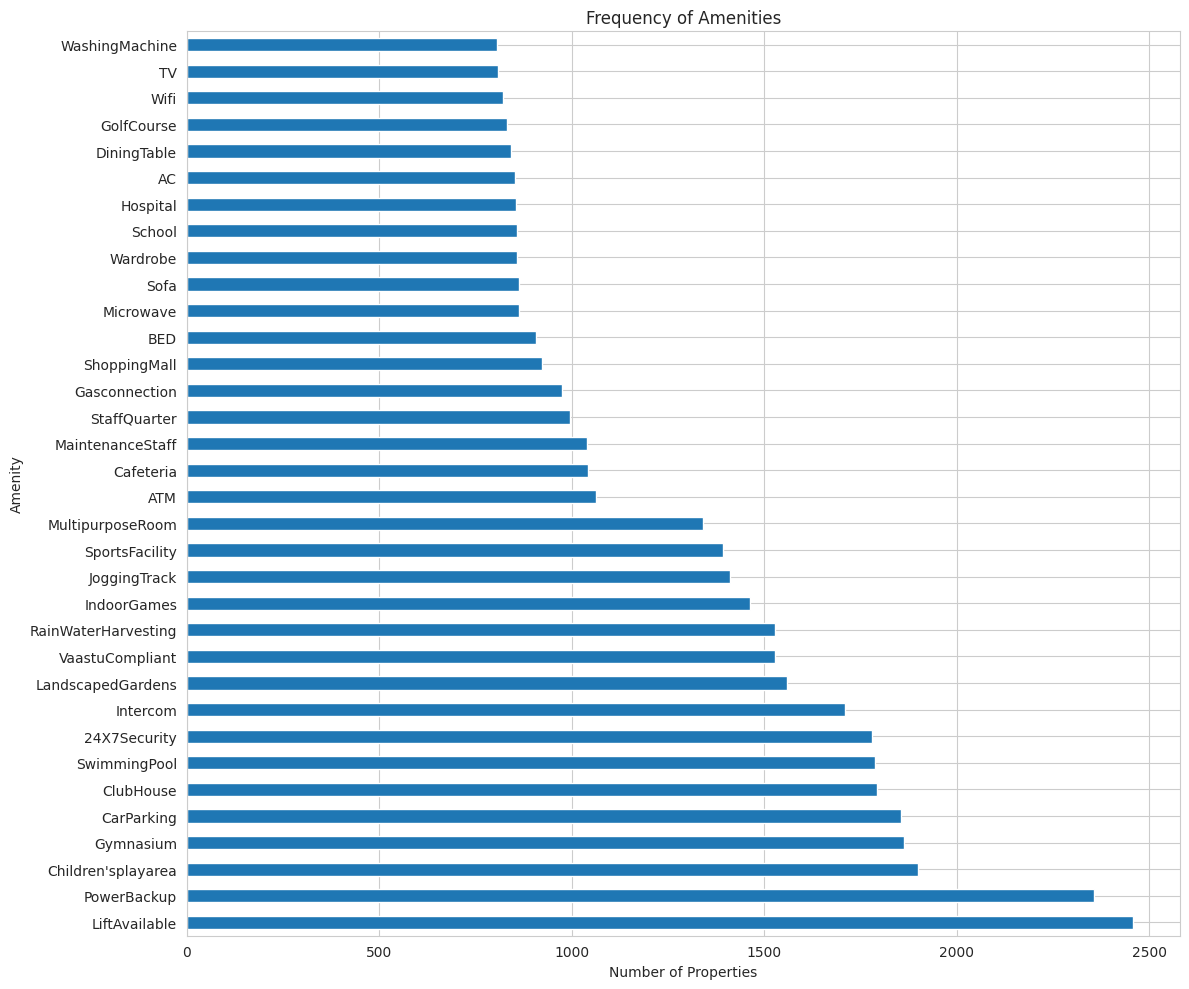

In [41]:
plt.figure(figsize=(12, 10))
amenities_counts.plot(kind='barh')
plt.title('Frequency of Amenities')
plt.xlabel('Number of Properties')
plt.ylabel('Amenity')
plt.tight_layout()
plt.savefig('amenities_frequency.png')

# Model creation

In [42]:
features = df.drop('Price', axis=1)
target = df['Price']

In [44]:
# One-Hot encoding
X = pd.get_dummies(features)
y = target

In [45]:
print("Features after One-Hot Encoding:")
print(X.head())

Features after One-Hot Encoding:
   Area  No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  SwimmingPool  \
0  1340                2       0                 0          1             1   
1  3498                4       0                 0          1             1   
2  1318                2       0                 0          1             0   
3  1295                3       1                 0          0             0   
4  1145                2       0                 0          0             0   

   LandscapedGardens  JoggingTrack  RainWaterHarvesting  IndoorGames  ...  \
0                  1             1                    1            1  ...   
1                  1             1                    1            1  ...   
2                  0             0                    0            1  ...   
3                  0             0                    0            0  ...   
4                  1             0                    0            0  ...   

   Location_Zamistanpur  Loca

In [48]:
# Data division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print("X train size:", X_train.shape)
print("X test size:", X_test.shape)

X train size: (2014, 281)
X test size: (504, 281)


In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

# Model evaluation

In [54]:
# 1. Prediction based on the test data
predictions = model.predict(X_test)

In [55]:
# Evaluation
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [56]:
print(f"Determination coefficient (R²): {r2:.2f}")
print(f"MAE: {mae:,.0f} IDR")

Determination coefficient (R²): 0.77
MAE: 2,085,316 IDR


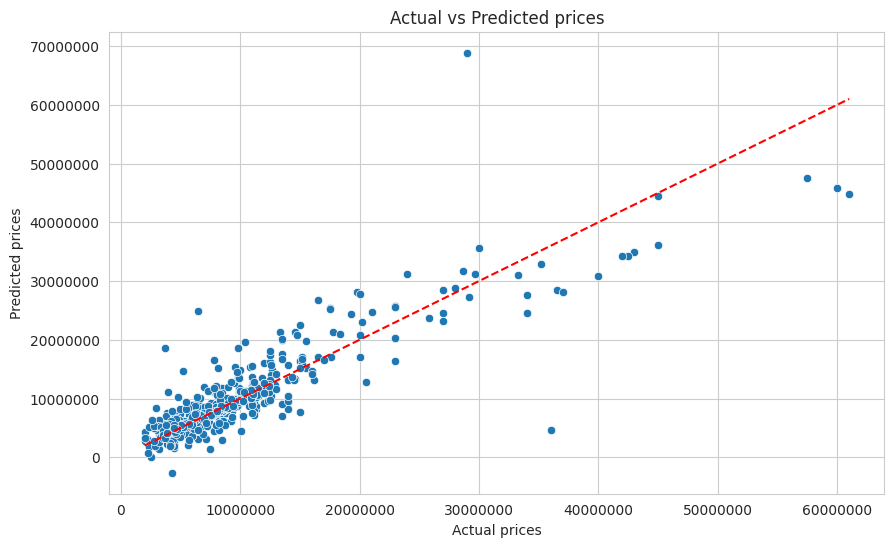

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")
# Line of ideal predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.ticklabel_format(style='plain')
plt.show()

# Testing on real data

In [63]:
my_test_house = {
    'Area': 1600,
    'Location': 'Kukatpally',
    'No. of Bedrooms': 3,
    'Resale': 0,
    'MaintenanceStaff': 1,
    'Gymnasium': 1,
    'SwimmingPool': 1,
    'LandscapedGardens': 1,
    'JoggingTrack': 1,
    'RainWaterHarvesting': 1,
    'IndoorGames': 0,
    'ShoppingMall': 0,
    'Intercom': 1,
    'SportsFacility': 0,
    'ATM': 1,
    'ClubHouse': 1,
    'School': 0,
    '24X7Security': 1,
    'PowerBackup': 1,
    'CarParking': 1,
    'StaffQuarter': 0,
    'Cafeteria': 0,
    'MultipurposeRoom': 0,
    'Hospital': 0,
    'WashingMachine': 0,
    'Gasconnection': 1,
    'AC': 0,
    'Wifi': 0,
    "Children'splayarea": 1,
    'LiftAvailable': 1,
    'BED': 0,
    'VaastuCompliant': 1,
    'Microwave': 0,
    'GolfCourse': 0,
    'TV': 0,
    'DiningTable': 0,
    'Sofa': 0,
    'Wardrobe': 0,
    'Refrigerator': 0
}

In [64]:
single_house_df = pd.get_dummies(pd.DataFrame([my_test_house]))

In [65]:
final_test_data = single_house_df.reindex(columns=X.columns, fill_value=0)

In [66]:
predicted_price = model.predict(final_test_data)

In [67]:
print(f"Predicted price: {predicted_price[0]:,.0f} IDR")

Predicted price: 8,019,697 IDR
